In [1]:
#Perceptrons:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
per_clf.predict([[2, 0.5]])

array([0])

In [2]:
#Multi-Layer Perceptron and Backpropagation
#When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN).
#We can use MLPs for: Binary classication, Multilabel binary classication, Multiclass classication
#Implementation:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.13.0'

In [3]:
#Alright so we will be using ft.keras to train and learn on the fasion mnist dataset:

#First, we load the data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
#so now lets split the train dataset to train and val dataset. 
#For simplicity, we just scale the pixel intensities down to the 0-1 range by dividing them by 255.0
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
#we will also be needing the class names of our data so...
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
#Now let’s build the neural network! Here is a classification MLP with two hidden layers:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
#Lets view the model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
weights, biases = model.layers[1].get_weights()#Get the weights of the 2nd layer
weights, biases

(array([[-0.06452584, -0.01002304, -0.04436434, ..., -0.02231461,
          0.04254539,  0.03409675],
        [-0.05074376,  0.05588576,  0.01594791, ..., -0.07276185,
          0.0679089 ,  0.00316866],
        [ 0.04931135, -0.04706101,  0.00576601, ...,  0.02527393,
         -0.05719113, -0.02586841],
        ...,
        [ 0.01345005,  0.04441172, -0.05330942, ...,  0.06599291,
          0.06089827, -0.04433878],
        [-0.00139982, -0.02519238, -0.05851949, ...,  0.05112222,
          0.04073716, -0.03576735],
        [-0.02177476, -0.01063517, -0.05901664, ...,  0.02597781,
         -0.06013984,  0.06653751]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [10]:
#Compiling the Model
#After a model is created, you must call its compile() method to specify the loss function and the optimizer to use.
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
#Now we train the model:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))#It is not compulsary to add the calidtion_data

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7172 - accuracy: 0.7655 - val_loss: 0.5003 - val_accuracy: 0.8304
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4862 - accuracy: 0.8311 - val_loss: 0.4372 - val_accuracy: 0.8508
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4418 - accuracy: 0.8453 - val_loss: 0.4461 - val_accuracy: 0.8400
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4135 - accuracy: 0.8547 - val_loss: 0.4382 - val_accuracy: 0.8394
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3938 - accuracy: 0.8619 - val_loss: 0.3849 - val_accuracy: 0.8682
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3768 - accuracy: 0.8673 - val_loss: 0.3614 - val_accuracy: 0.8726
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3636 - accuracy: 0.8713 - val_loss: 0.3693 - val_acc

In [12]:
2002566795

2002566795

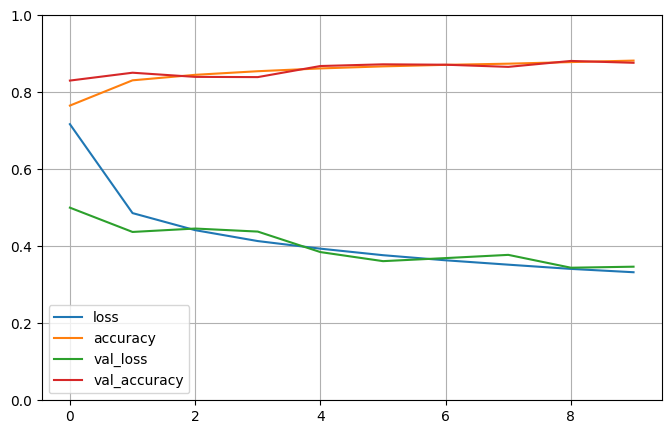

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
#Now we evaluate on the test set:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 67.1140 - accuracy: 0.8360


[67.11396026611328, 0.8360000252723694]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 193ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_pred = [list(n).index(max(n)) for n in y_proba]

In [17]:
[class_names[n] for n in y_pred], [class_names[n] for n in y_test[:3]]
#well there you go.. Our classifier did pretty well

(['Ankle boot', 'Pullover', 'Trouser'], ['Ankle boot', 'Pullover', 'Trouser'])

In [18]:
#Building a Regression MLP Using the Sequential API: well we'll be using the carlifonia dataset...
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
#Note tis dataset version is much simpler than the one seen in the previous example...

In [19]:
#We define the model:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)])

In [20]:
#compile the model:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [21]:
#Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
363/363 [==============================] - 3s 5ms/step - loss: 56.0974 - mse: 56.0974 - val_loss: 1.8323 - val_mse: 1.8323
Epoch 2/3
363/363 [==============================] - 1s 4ms/step - loss: 2.3379 - mse: 2.3379 - val_loss: 1.2176 - val_mse: 1.2176
Epoch 3/3
363/363 [==============================] - 1s 4ms/step - loss: 1.3955 - mse: 1.3955 - val_loss: 1.0201 - val_mse: 1.0201


In [22]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 1.1433 - mse: 1.1433


In [23]:
#Building Complex Models Using the Functional API 
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])#concatenate layer that moves the input upward towards 
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])
#A basic Wide nd Deep MLP

In [24]:
#We can also split the features: only one goes deep and the other goes wide...
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [25]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=2, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
#Note that we also have to split the input features since the model relies on split features...

Epoch 1/2
363/363 [==============================] - 4s 5ms/step - loss: 692.7478 - mse: 692.7478 - val_loss: 3.8063 - val_mse: 3.8063
Epoch 2/2
1/1 [==============================] - 0s 151ms/step


In [26]:
y_pred, y_test[:3]

(array([[3.781912 ],
        [3.3656104],
        [2.3598769]], dtype=float32),
 array([3.864, 1.775, 1.091]))

In [27]:
mse_test

[3.699144124984741, 3.699144124984741]

In [28]:
#A multiple output model:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
#Two outputs, One without the concatenation, and one with concatenation
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="adam")
#we must also specify the loss fuction for the two outputs,else keras will just apply the same loss function accross the outputs
#we also set the loss weight, which tells keras that we care a lot more about the loss on the main output than the aux-output

In [29]:
#When training, instead of passing y_train, we just need to pass (y_train, y_train) (and the same goes for y_valid and y_test):
history = model.fit(
 [X_train_A, X_train_B], [y_train, y_train], epochs=2,
 validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/2
363/363 [==============================] - 6s 9ms/step - loss: 534.3419 - dense_13_loss: 569.0551 - dense_14_loss: 221.9209 - val_loss: 11.0745 - val_dense_13_loss: 11.8369 - val_dense_14_loss: 4.2134
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 27.2012 - dense_13_loss: 28.5232 - dense_14_loss: 15.3030 - val_loss: 261.0389 - val_dense_13_loss: 281.4244 - val_dense_14_loss: 77.5689


In [30]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 4ms/step - loss: 250.3864 - dense_13_loss: 269.5150 - dense_14_loss: 78.2287


In [31]:
total_loss, main_loss, aux_loss

(250.3864288330078, 269.5150146484375, 78.2286605834961)

In [32]:
#Similarly, the predict() method will return predictions for each output:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 150ms/step


In [33]:
y_pred_main, y_pred_aux, y_test[:3]

(array([[ 5.2329626],
        [19.702917 ],
        [ 6.966193 ]], dtype=float32),
 array([[  1.7073781],
        [-10.909861 ],
        [  1.3941038]], dtype=float32),
 array([3.864, 1.775, 1.091]))

In [34]:
#for models involve loops, varying shapes, conditional branching, and other dynamic behaviors.
#Well basically create a Deep and Wide model as a class so you can call it at any point in a code this makes it easier
#  to code models using if statements and co.
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()
#Just like that we have the model and whenever we use the Call() method we just need to pass a list of the split features data.

In [ ]:
#Saving and Restoring a Model:
#Saving a trained Keras model is as simple as it gets:
model.save("my_keras_model.h5")

In [ ]:
#Loading the model is just as easy:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
#If for example you are training on a very large lataset that may take hours to reain you might want to save the model as the 
#training progresses.
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")# saves the model at the end of ach epoch...
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb]) #add the callback when fitting the data

In [37]:
y_train_full

array([2.298  , 5.00001, 1.016  , ..., 3.882  , 3.556  , 5.00001])